In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('playground-series-s5e5/train.csv')

In [3]:
print(f"Dataset Shape:{train_df.shape}")

print("\nData Info:")
train_df.info()

print("\nNumerical Features Summary:")
display(train_df.describe())

print("\nFirst 10 Rows of the Dataset:")
display(train_df.head(10))

Dataset Shape:(750000, 9)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB

Numerical Features Summary:


id            Age         Height         Weight  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean   374999.500000      41.420404     174.697685      75.145668   
std    216506.495284      15.175049      12.824496      13.982704   
min         0.000000      20.000000     126.000000      36.000000   
25%    187499.750000      28.000000     164.000000      63.000000   
50%    374999.500000      40.000000     174.000000      74.000000   
75%    562499.250000      52.000000     185.000000      87.000000   
max    749999.000000      79.000000     222.000000     132.000000   

            Duration     Heart_Rate      Body_Temp       Calories  
count  750000.000000  750000.000000  750000.000000  750000.000000  
mean       15.421015      95.483995      40.036253      88.282781  
std         8.354095       9.449845       0.779875      62.395349  
min         1.000000      67.000000      37.100000       1.000000  
25%         8.000000      88.000000      39.600000      34.000000  
50%        15.000000      95.000000      40.300000      77.000000  
75%        23.000000     103.000000      40.700000     136.000000  
max        30.000000     128.000000      41.500000     314.000000


First 10 Rows of the Dataset:


id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4  female   38   166.0    61.0      25.0       102.0       40.6     146.0
5   5  female   26   156.0    56.0      19.0       100.0       40.5     103.0
6   6  female   21   172.0    73.0       3.0        81.0       38.3       9.0
7   7    male   46   188.0    94.0      23.0       100.0       40.8     145.0
8   8  female   33   166.0    63.0      25.0       107.0       40.5     161.0
9   9    male   65   185.0    88.0      23.0       104.0       41.0     185.0

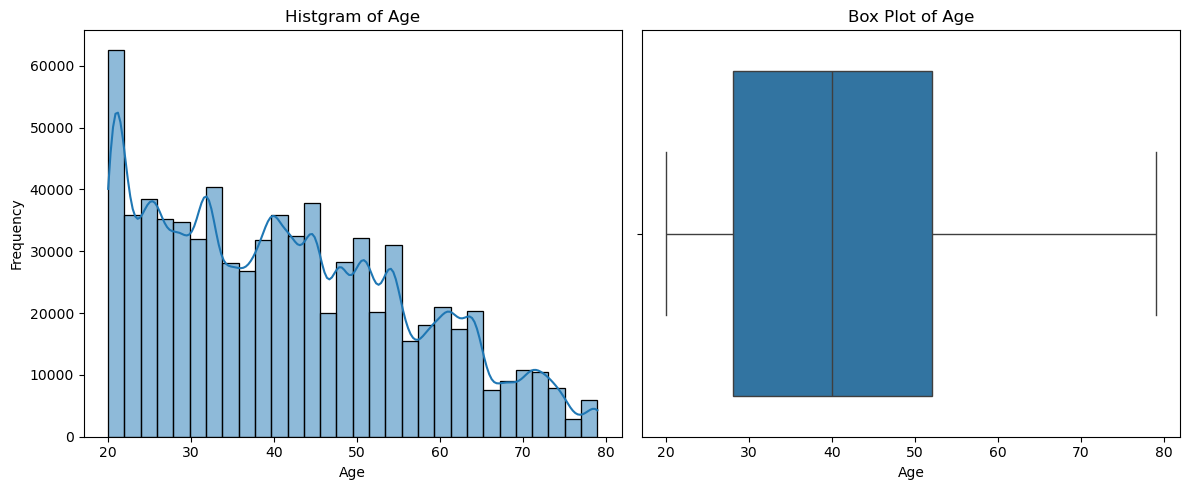


Statistics for Age:
Skewness: 0.44
Number of Missing Values: 0


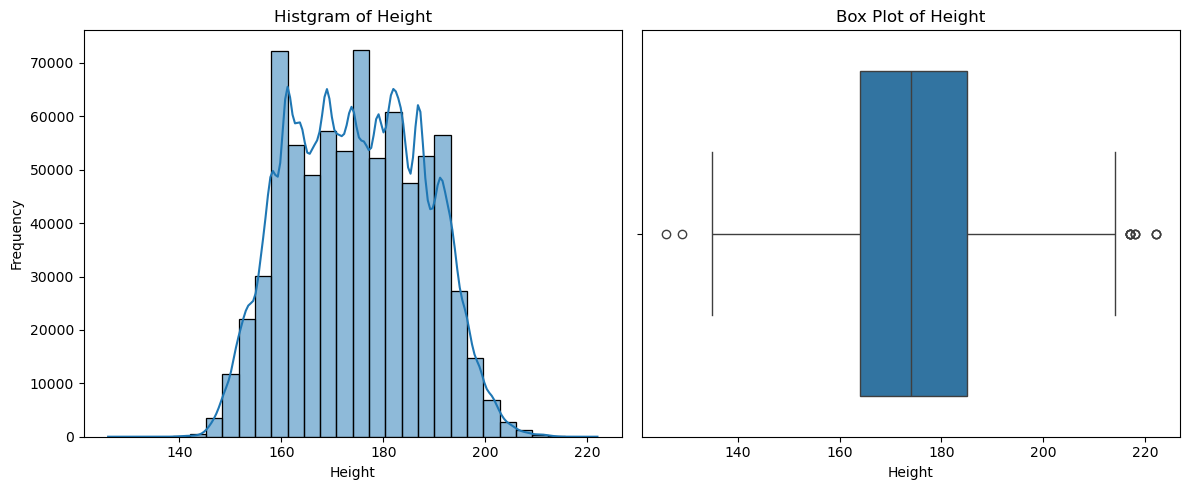


Statistics for Height:
Skewness: 0.05
Number of Missing Values: 0


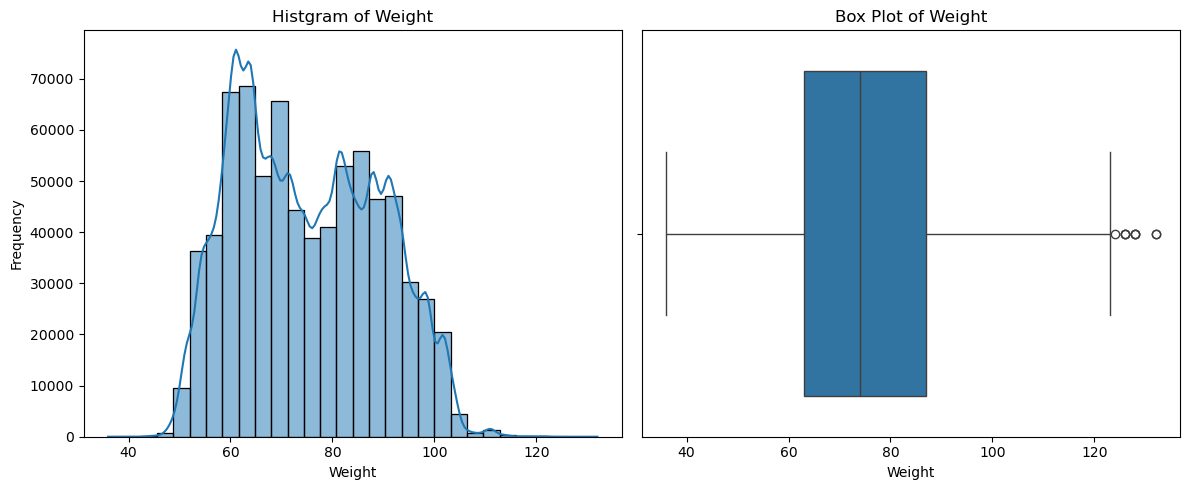


Statistics for Weight:
Skewness: 0.21
Number of Missing Values: 0


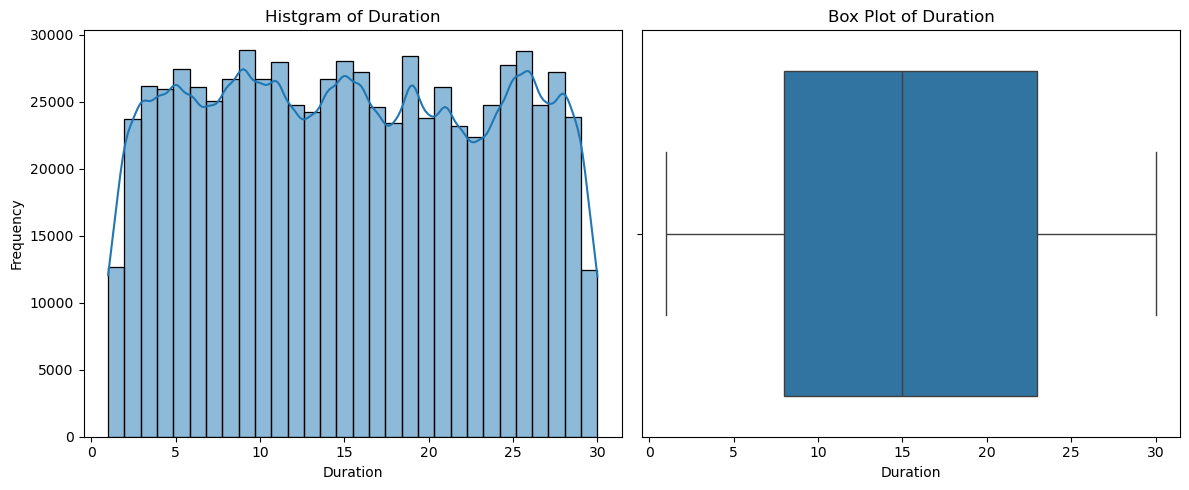


Statistics for Duration:
Skewness: 0.03
Number of Missing Values: 0


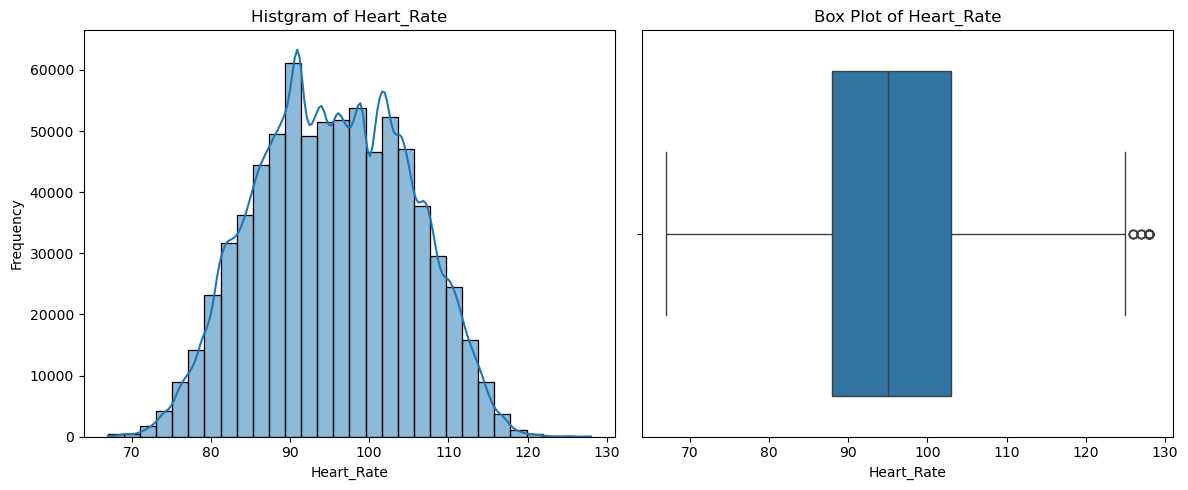


Statistics for Heart_Rate:
Skewness: -0.01
Number of Missing Values: 0


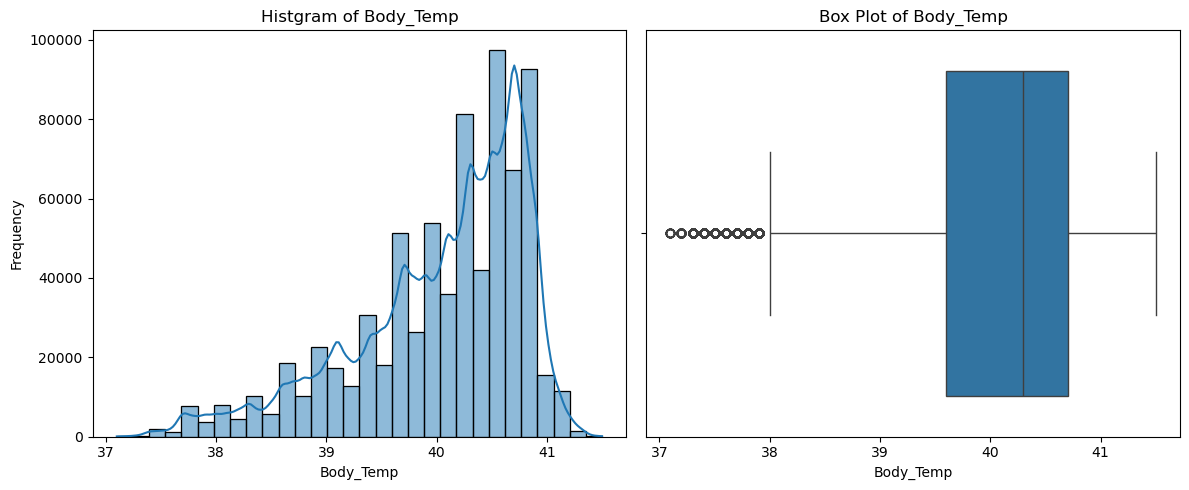


Statistics for Body_Temp:
Skewness: -1.02
Number of Missing Values: 0


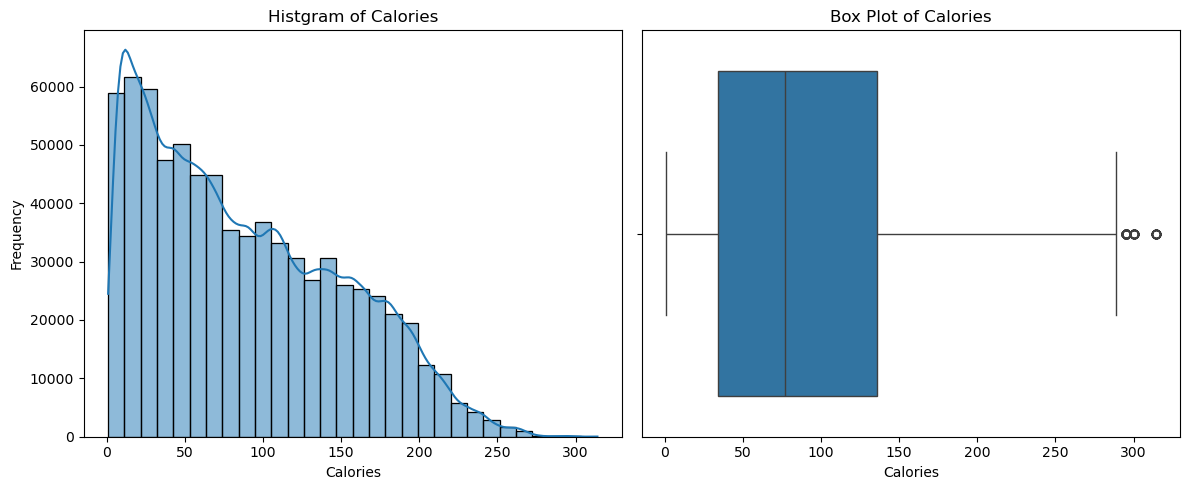


Statistics for Calories:
Skewness: 0.54
Number of Missing Values: 0


In [4]:
numerical_features = [
    "Age",
    "Height",
    "Weight",
    "Duration",
    "Heart_Rate",
    "Body_Temp",
    "Calories"
]
for feature in numerical_features:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(train_df[feature],kde=True,bins=30)
    plt.title(f"Histgram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

    plt.subplot(1,2,2)
    sns.boxplot(x=train_df[feature])
    plt.title(f"Box Plot of {feature}")

    plt.tight_layout()
    plt.show()

    print(f"\nStatistics for {feature}:")
    print(f"Skewness: {train_df[feature].skew():.2f}")#歪度
    print(f"Number of Missing Values: {train_df[feature].isnull().sum()}")

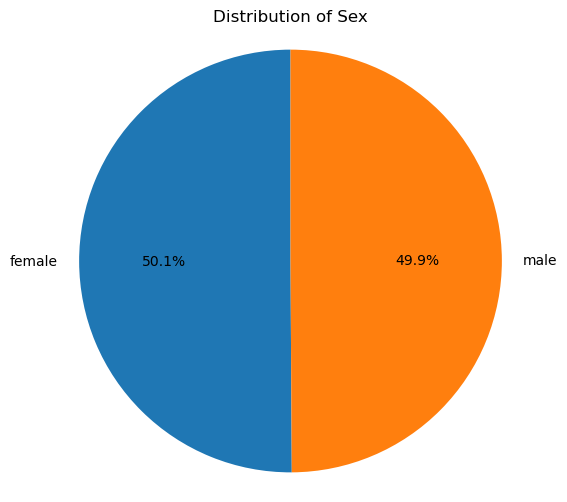

Number of Unique Calories: 277
Missing Values in Calories:0


In [5]:
#categorical feature
sex_counts = train_df["Sex"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sex_counts,labels=sex_counts.index,autopct='%1.1f%%',startangle=90)
plt.title("Distribution of Sex")
plt.axis("equal")
plt.show()
print(f"Number of Unique {feature}: {train_df[feature].nunique()}")
print(f"Missing Values in {feature}:{train_df[feature].isnull().sum()}")

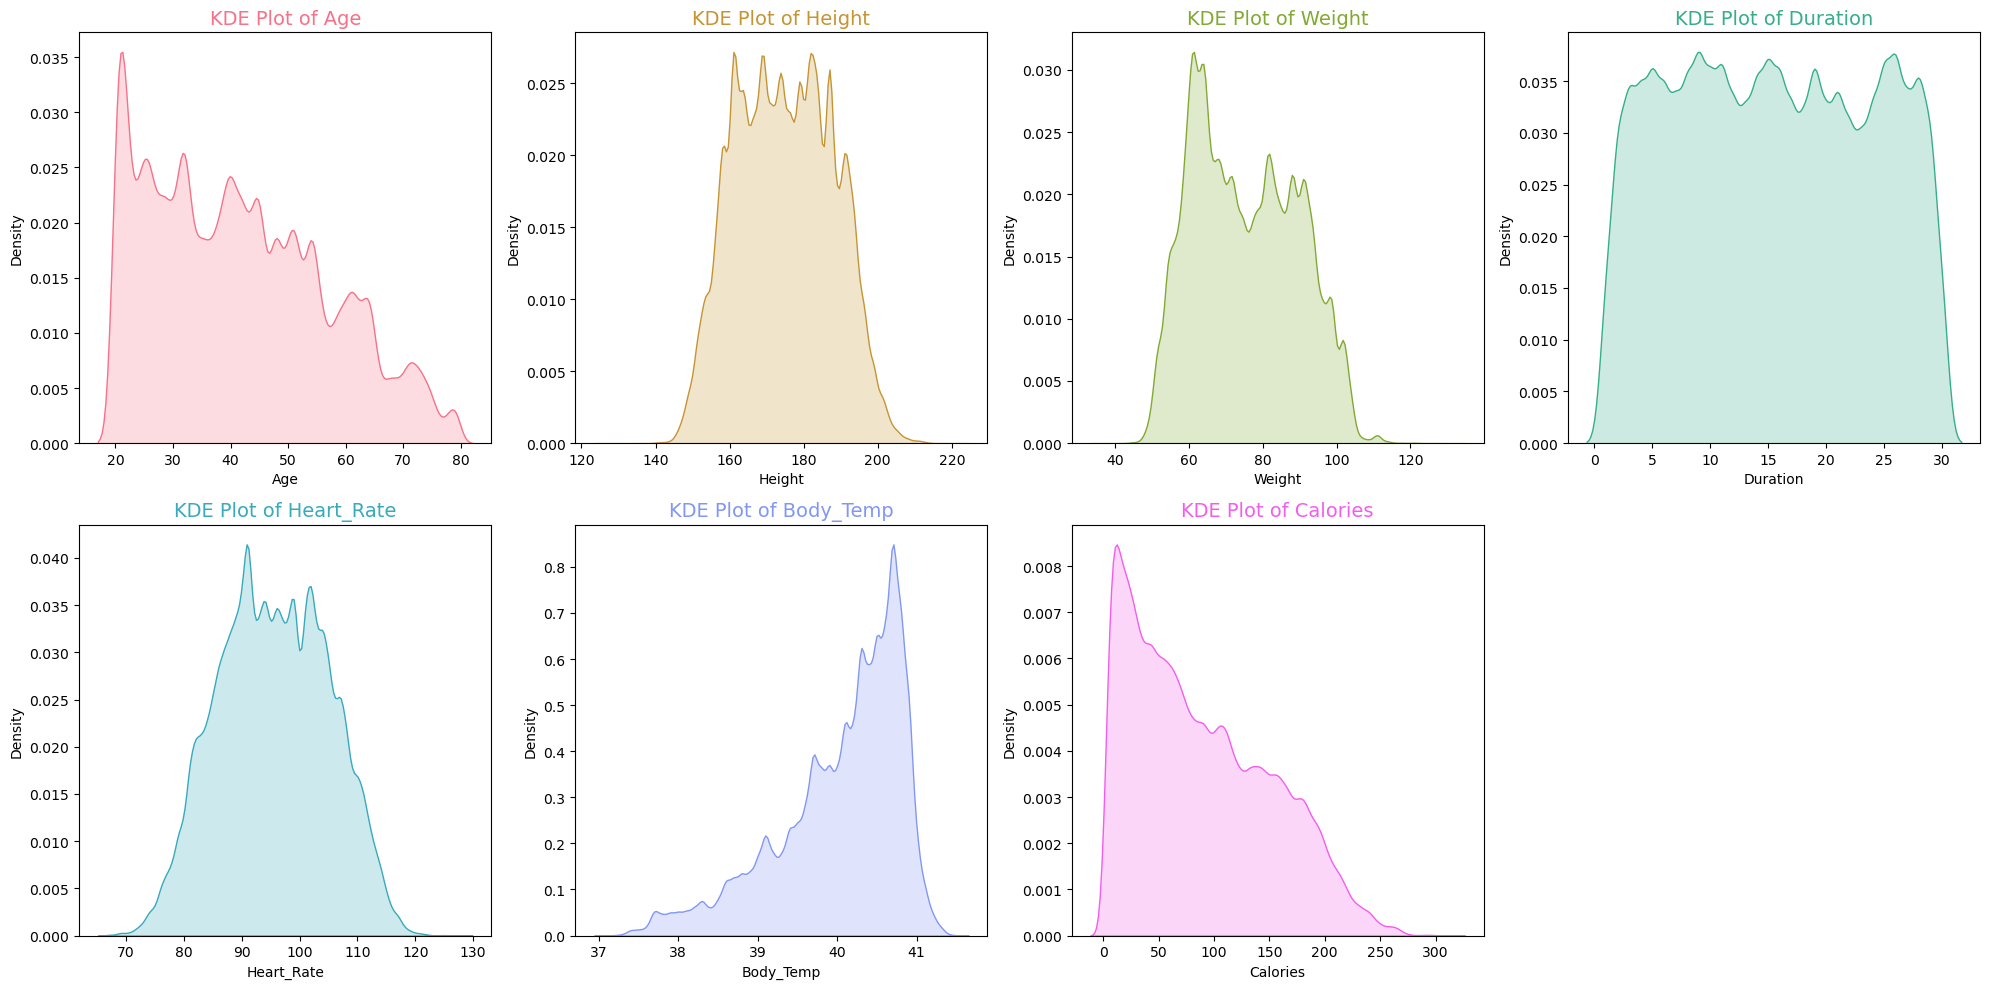

In [6]:
#kde
colors = sns.color_palette('husl',len(numerical_features))

rows = -(-len(numerical_features)//4)
plt.figure(figsize=(20,5*rows))

for i,(col,color) in enumerate(zip(numerical_features,colors),1):
    plt.subplot(rows,4,i)
    sns.kdeplot(data=train_df,x=col,fill=True,color=color)
    plt.title(f"KDE Plot of {col}",fontsize=14,color=color)
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

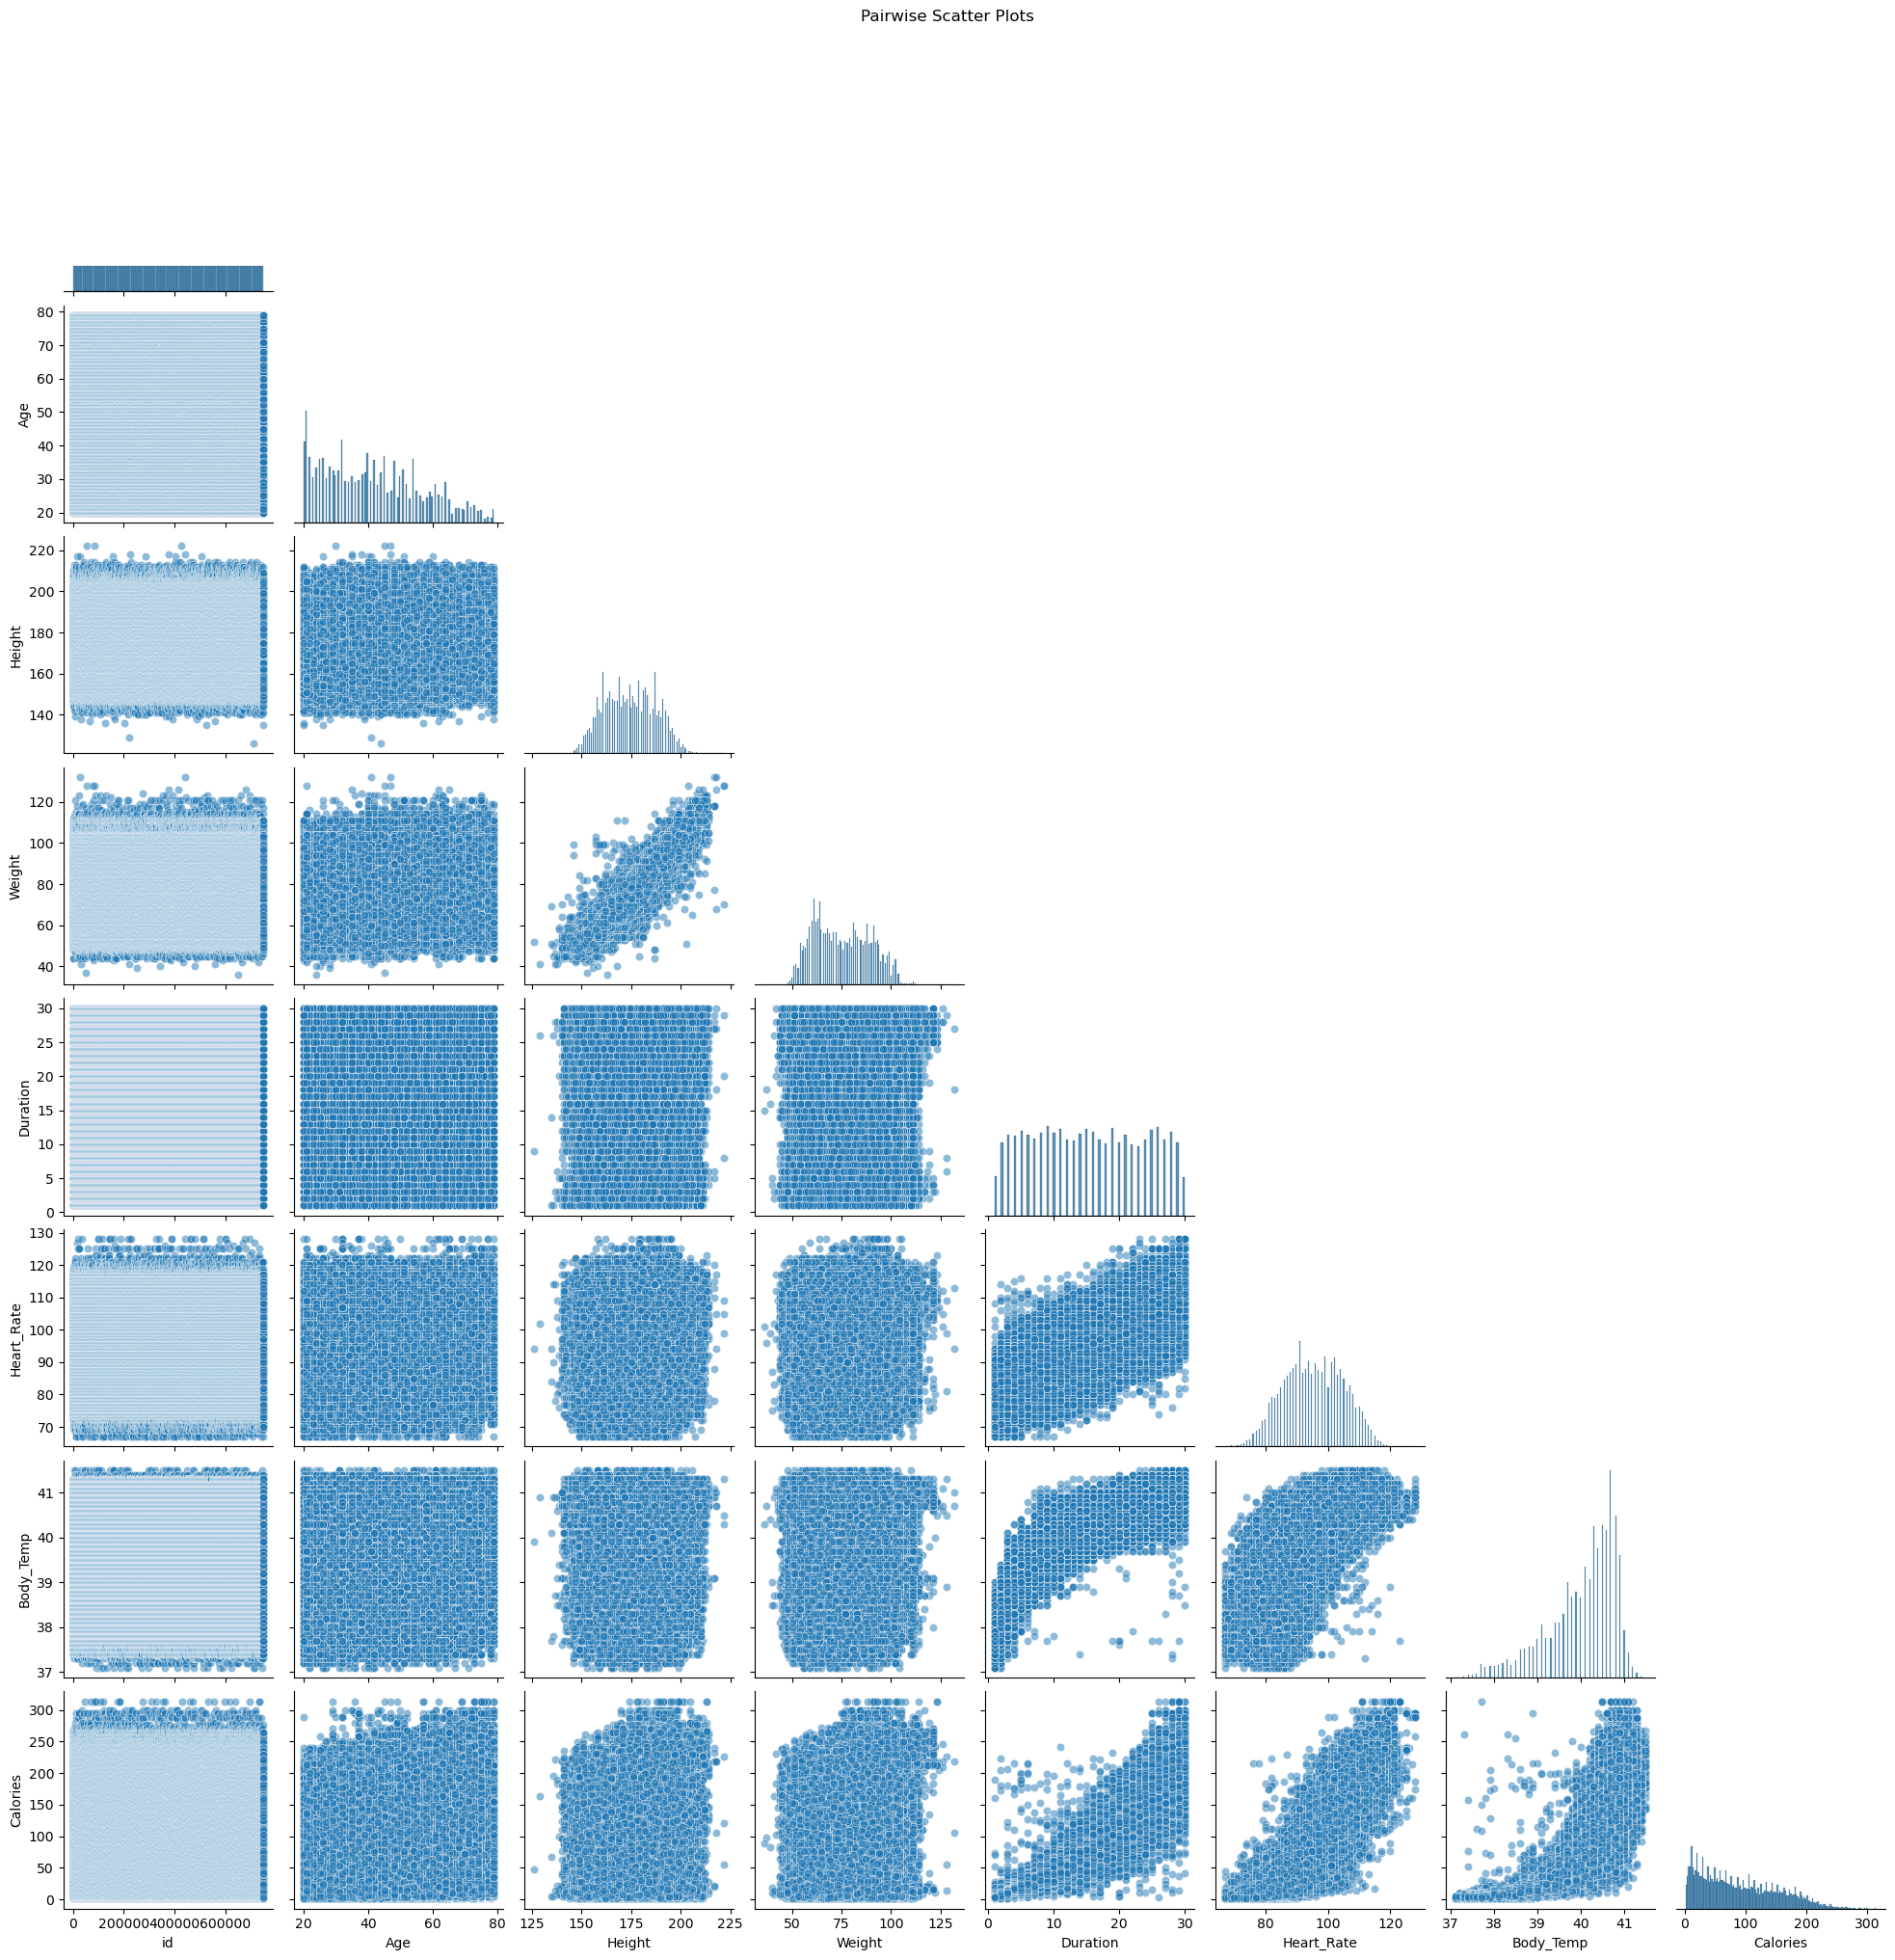

In [7]:
#scatter
numeric_df = train_df.select_dtypes(include="number")

sns.pairplot(numeric_df,corner=True,plot_kws={"alpha":.5})#cornerは下三角
plt.suptitle("Pairwise Scatter Plots",y=1.02)
plt.show()

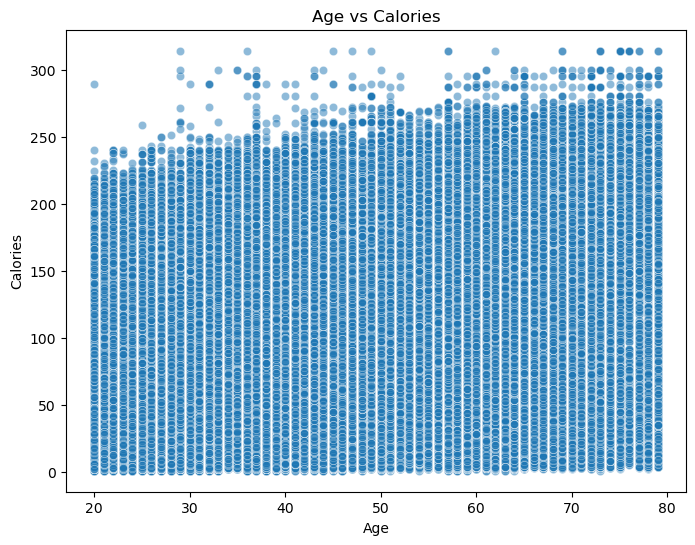

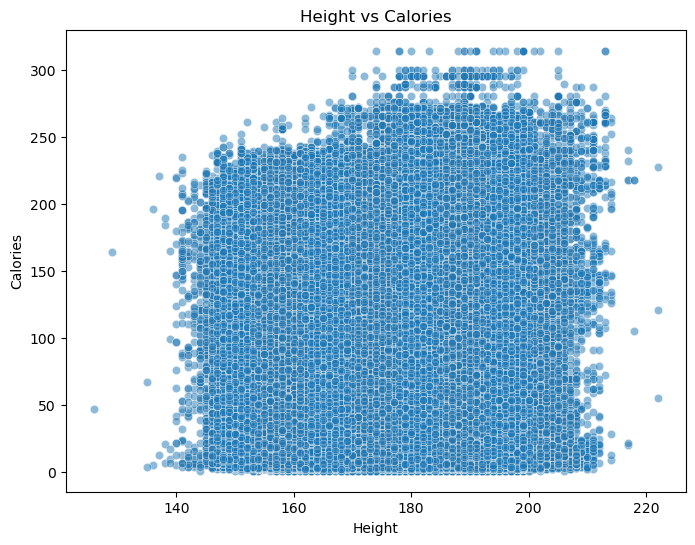

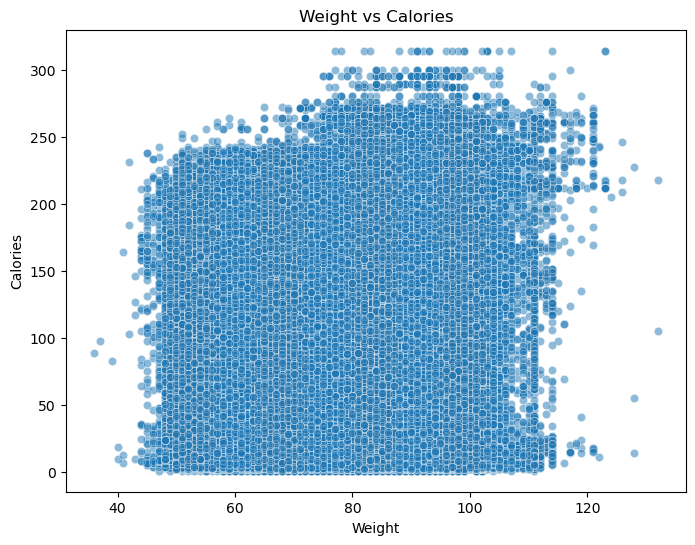

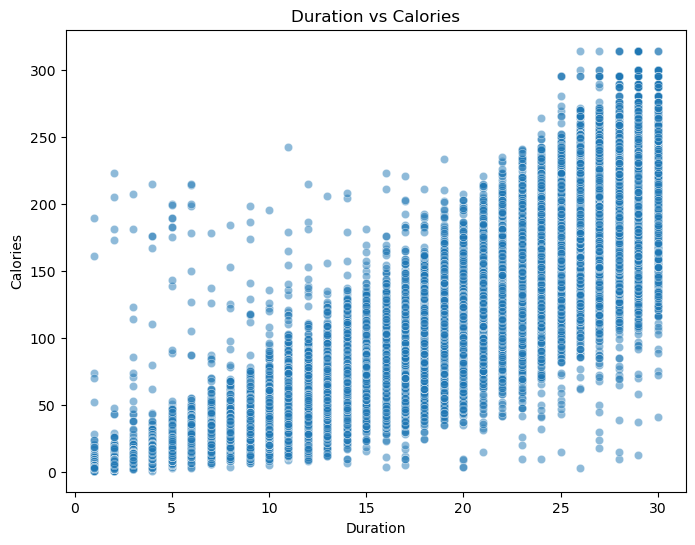

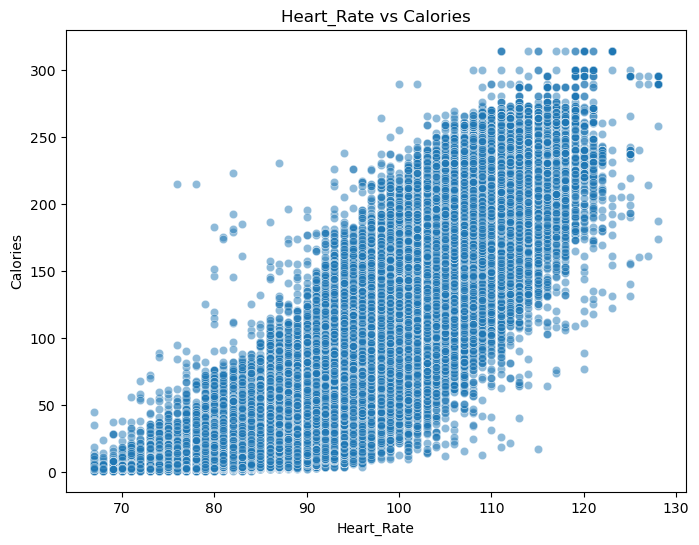

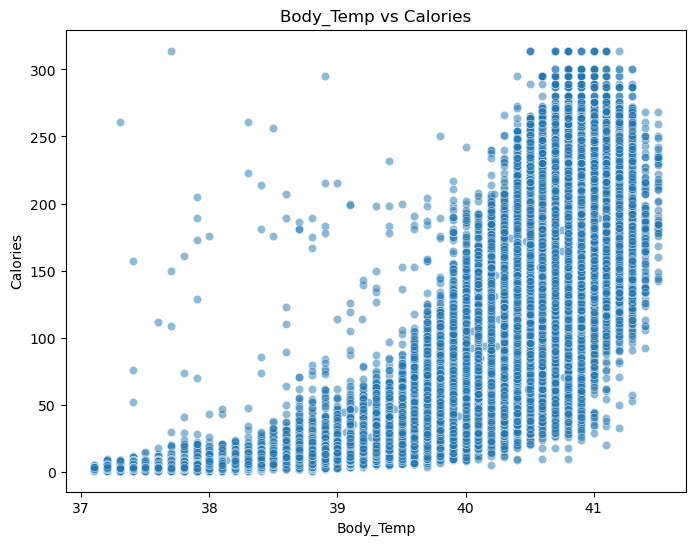

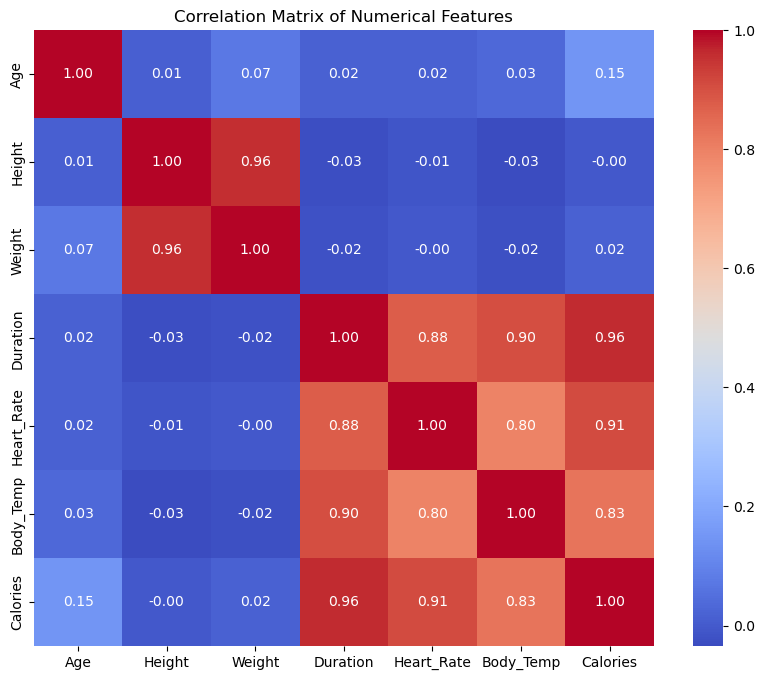

In [ ]:
for feature in numerical_features[:-1]:
    plt.figure(figsize=(8,6))
    sns.scatterplot(
        x=train_df[feature],y=train_df["Calories"],
        alpha=.5
    )
    plt.title(f"{feature} vs Calories")
    plt.xlabel(feature)
    plt.ylabel("Calories")
    plt.show()

correlation_matrix = train_df[numerical_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

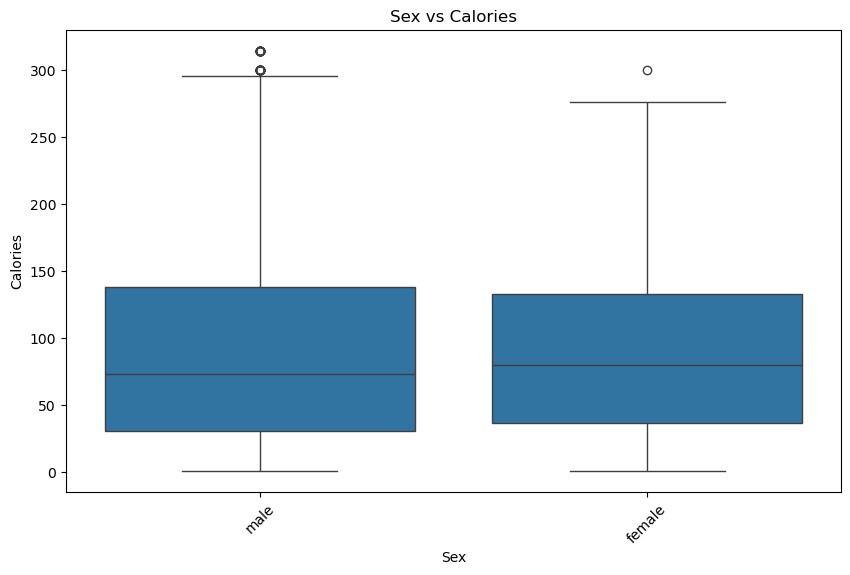

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x=train_df["Sex"],y=train_df["Calories"])
plt.title("Sex vs Calories")
plt.xlabel("Sex")
plt.ylabel("Calories")
plt.xticks(rotation=45)
plt.show()

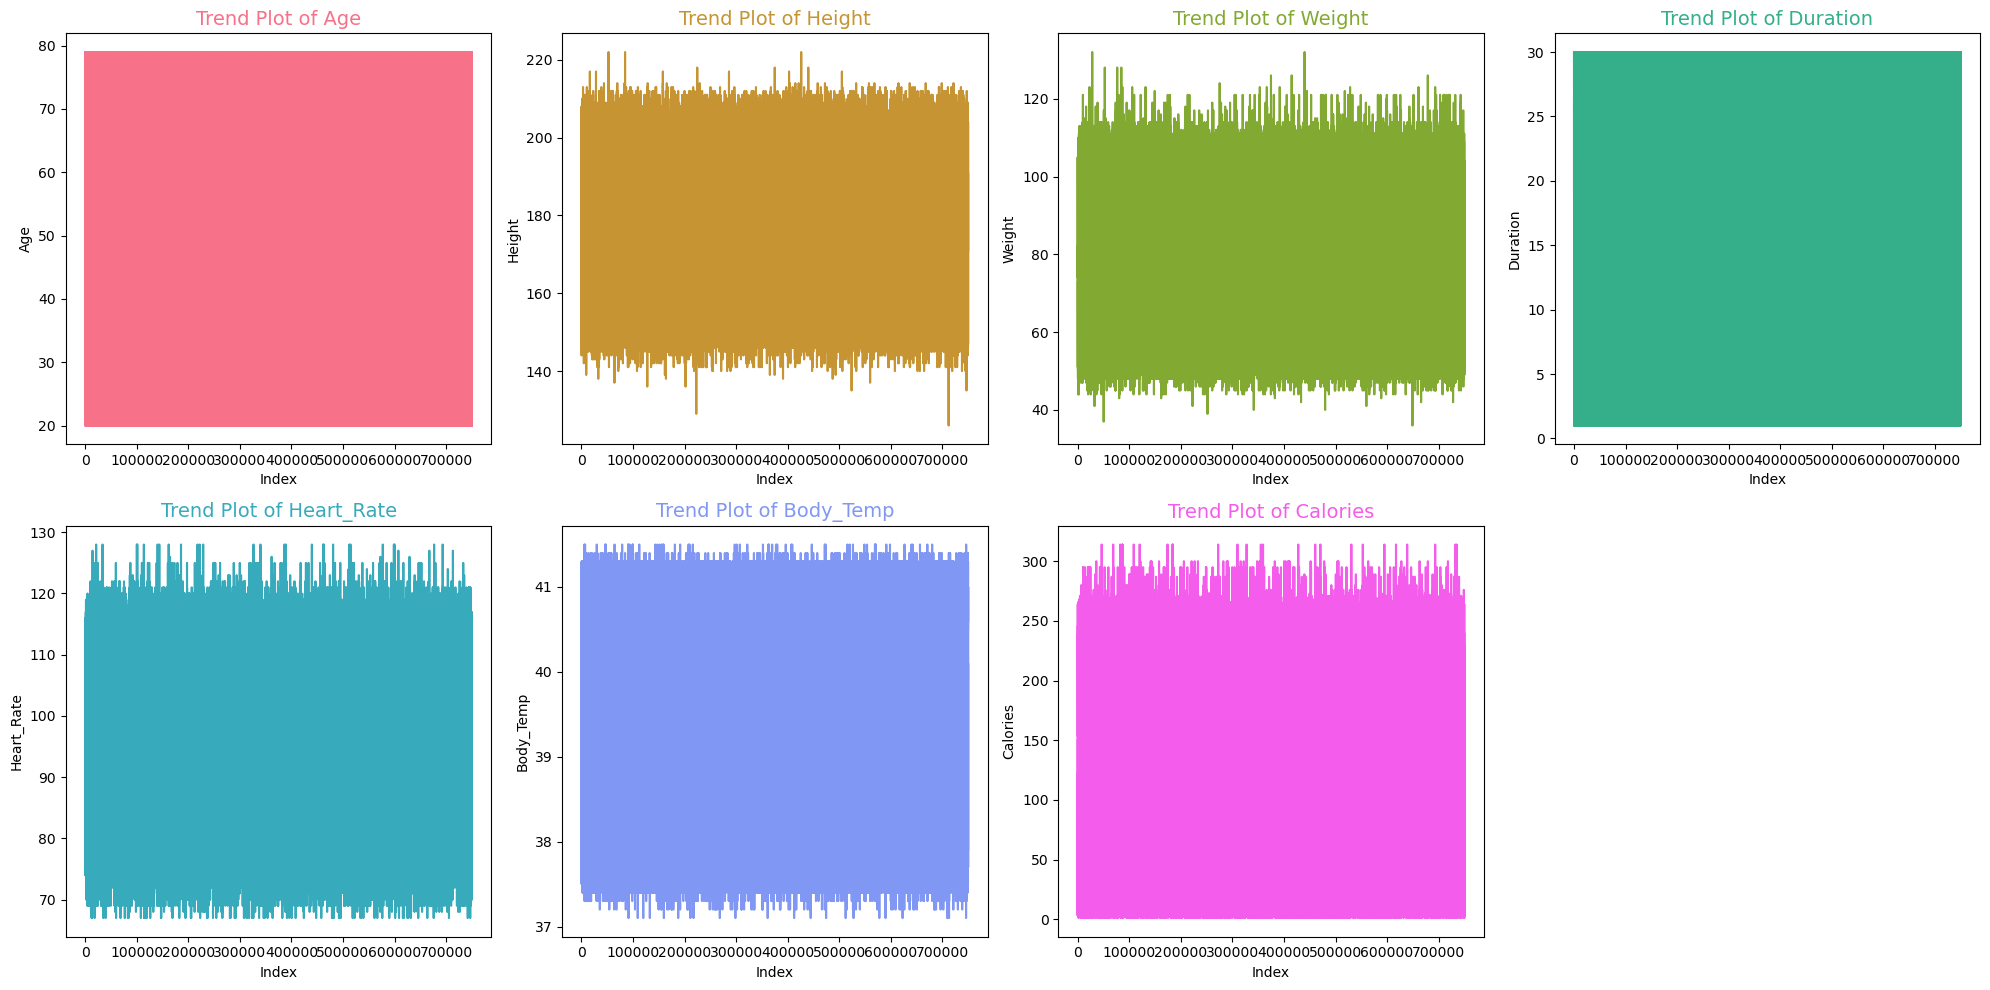

In [12]:
#trend
colors = sns.color_palette('husl',len(numerical_features))

rows = -(-len(numerical_features)//4)
plt.figure(figsize=(20,5*rows))

for i,(col,color) in enumerate(zip(numerical_features,colors),1):
    plt.subplot(rows,4,i)
    sns.lineplot(data=train_df[col],color=color)
    plt.title(f"Trend Plot of {col}",fontsize=14,color=color)
    plt.xlabel('Index')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

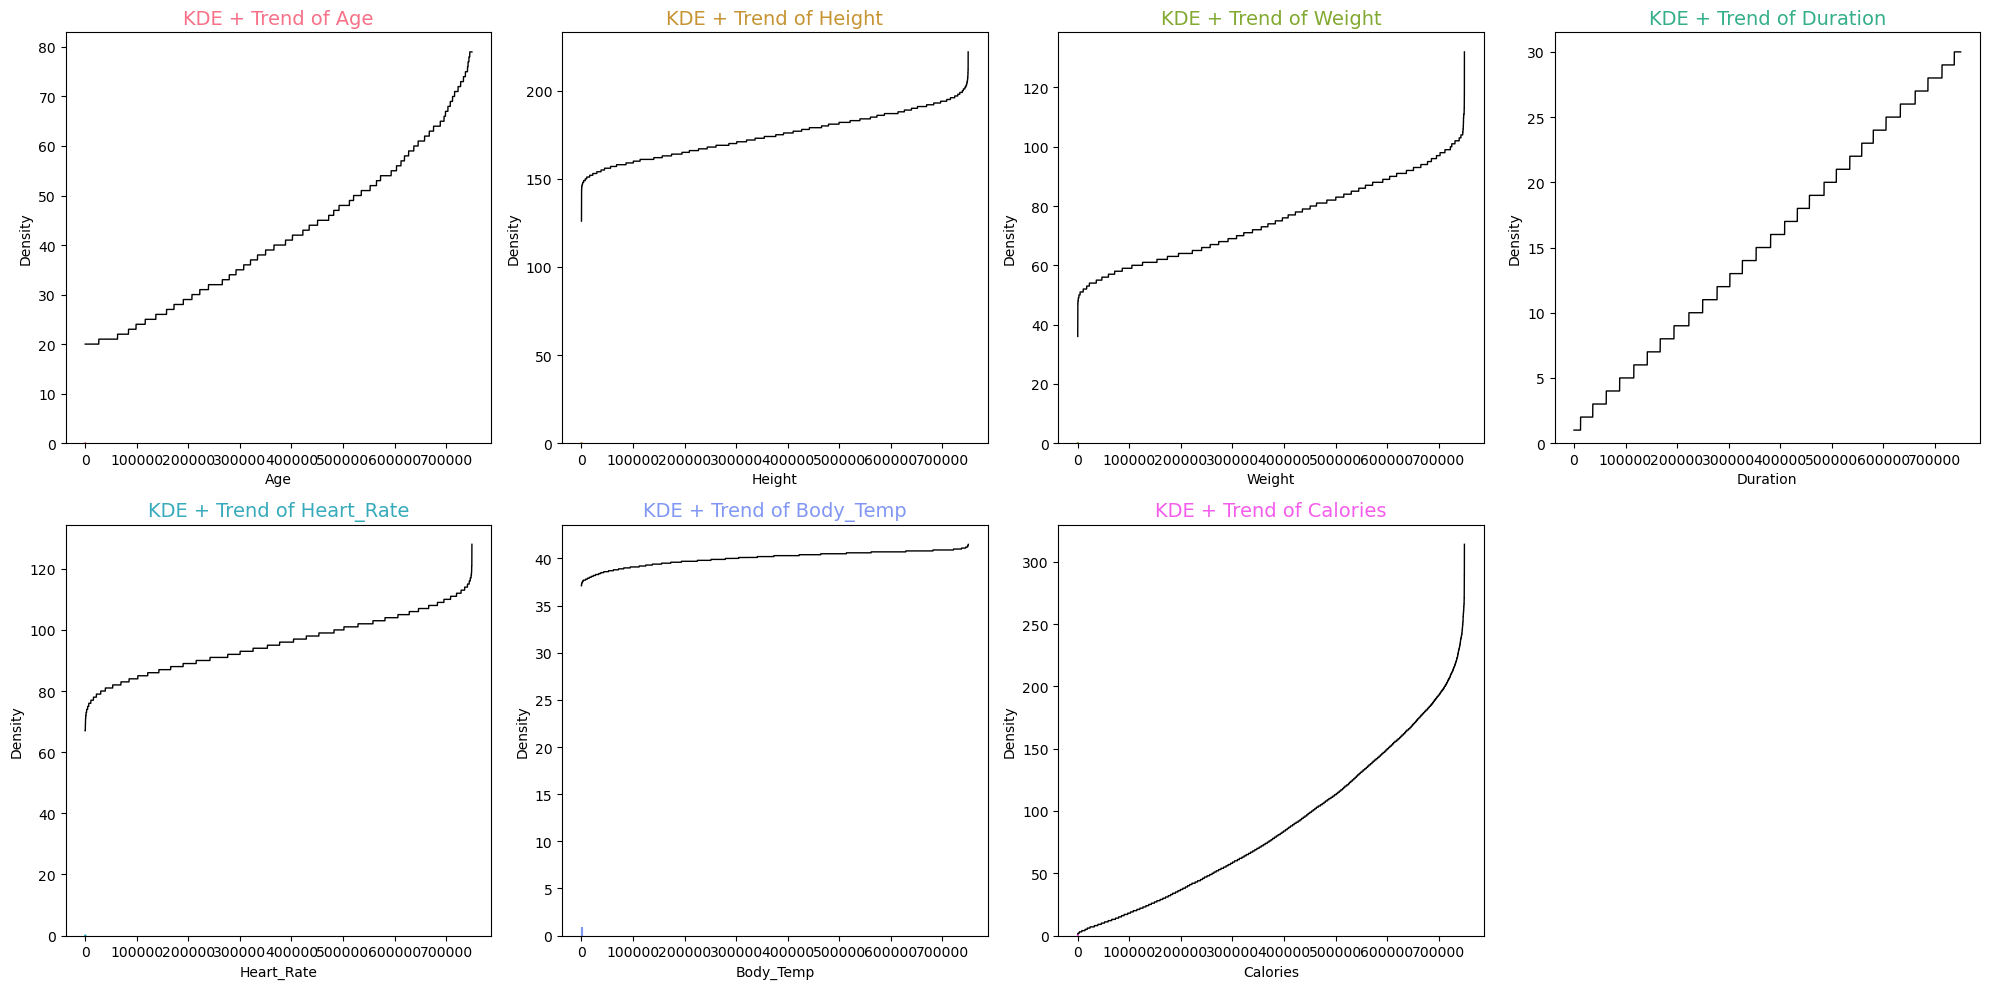

In [21]:
#KDE+Trend
colors = sns.color_palette('husl',len(numerical_features))
rows = -(-len(numerical_features)//4)
plt.figure(figsize=(20,5*rows))

for i,(col,color) in enumerate(zip(numerical_features,colors),1):#1はiを1からスタートさせてる
    plt.subplot(rows,4,i)
    sns.lineplot(data=train_df[col].sort_values().reset_index(drop=True),color='black',linewidth=1)
    sns.kdeplot(data=train_df[col].values,fill=False,color=color)
    plt.title(f"KDE + Trend of {col}",fontsize=14,color=color)
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

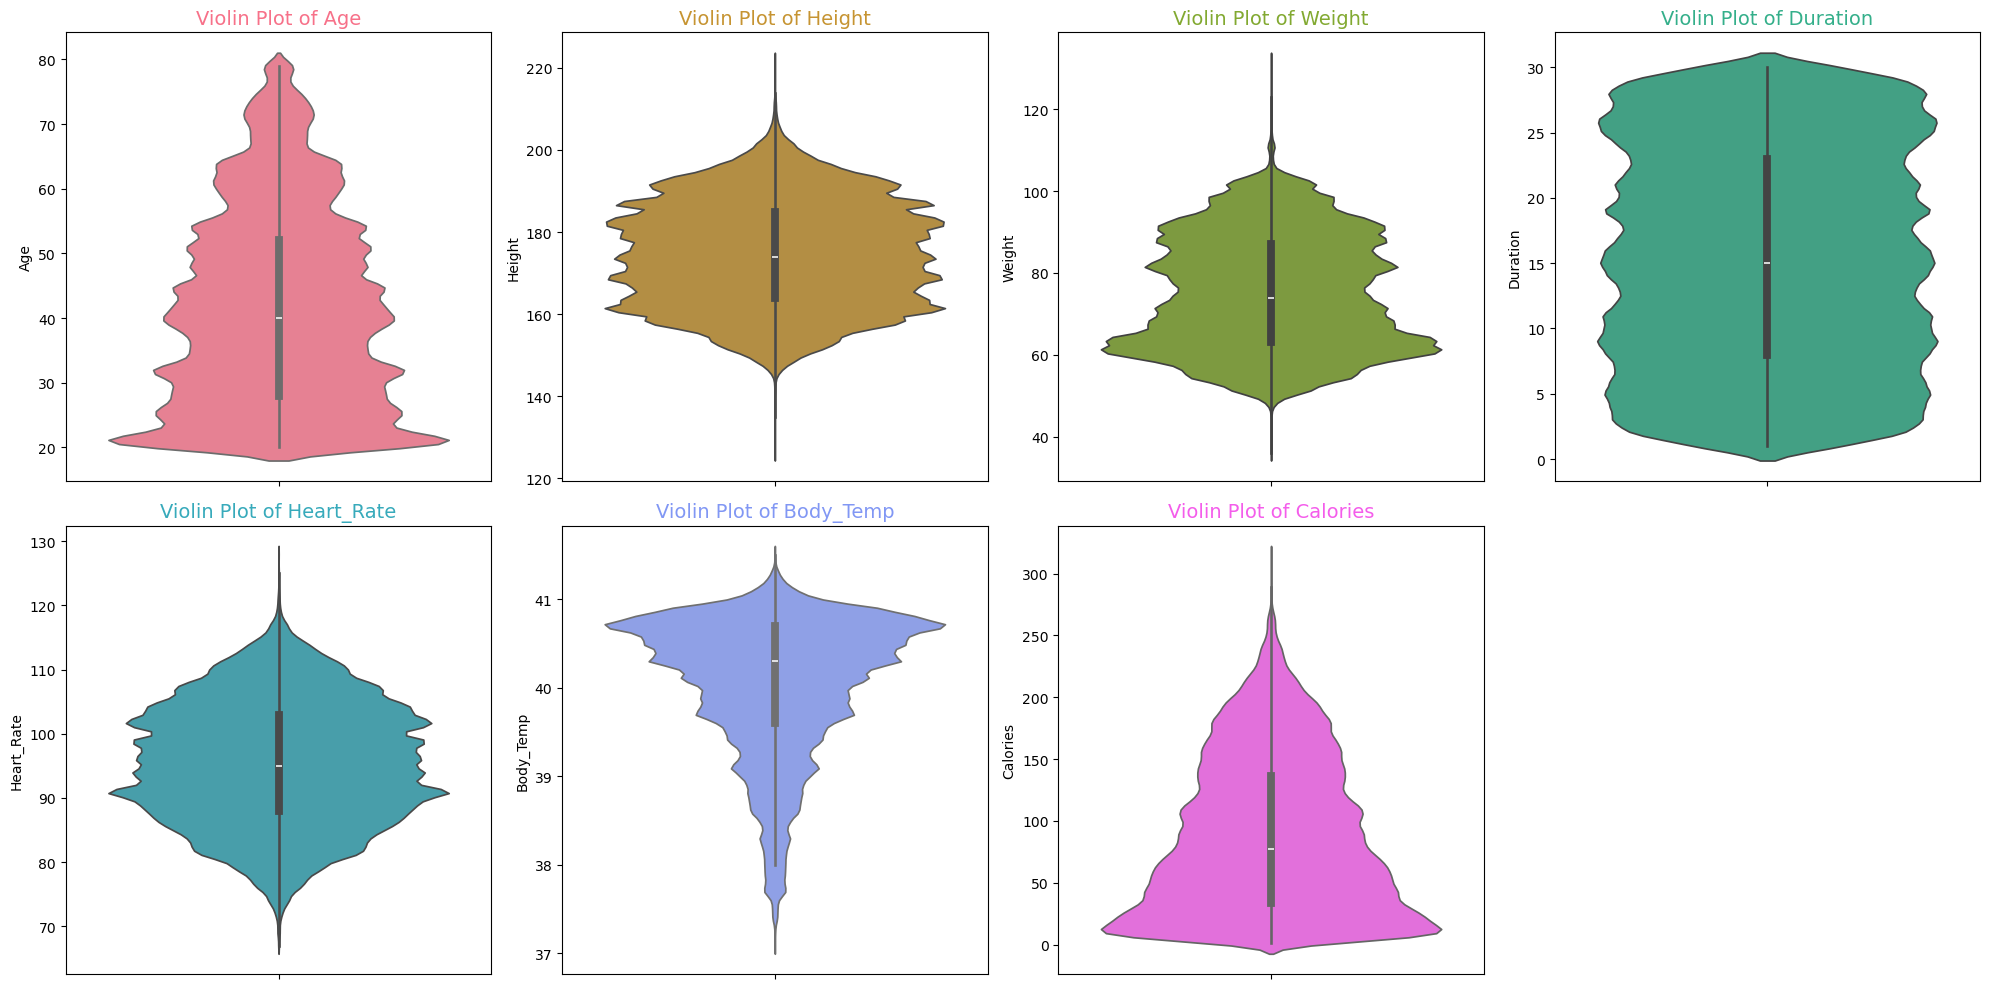

In [24]:
colors = sns.color_palette('husl',len(numerical_features))
rows = -(-len(numerical_features)//4)
plt.figure(figsize=(20,5*rows))

for i, (col,color) in enumerate(zip(numerical_features,colors),1):
    plt.subplot(rows,4,i)
    sns.violinplot(data=train_df,y=col,color=color)
    plt.title(f"Violin Plot of {col}",fontsize=14,color=color)
    plt.xlabel('')
    plt.ylabel(col)

plt.tight_layout()
plt.show()